<h1><center><b> DA&V (LAB_3), Data Wrangling </b></center></h1>

***INSTRUCTIONS*** <br>
You all are required to perform data wrangling and do all tasks, Every question has some sub-questions and all of them have designated code cell, Read the question carefully and write the code according to the number of question, Add comment in code section before writing code.

The dataset/s required for the lab download from Kaggle, use them according to the task.

<br>
<h1><center>GOOD LUCK, Happy Labbing :D </center></h1>

<h1>Muhammad Hamza khan</h1>
<h3>Roll Number:<span>21l-5654</span></h3>

<centre><h1>Import Libraries</h1></centre>

In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder as labelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer


### **1. Load the dataset**



In [88]:
train_df = pd.read_csv("train.csv")
store_df = pd.read_csv("store.csv")

C:\Users\Hamza\AppData\Local\Temp\ipykernel_13616\2421734235.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("train.csv")


In [89]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### **2. Merge both datasets into 1 dataset.**
*2.1. Show first and last 5 rows of the dataset.* <br>
*2.2. Show description of the dataset.*

In [90]:
merge_df = pd.merge(store_df,train_df,on='Store',how='inner')

In [91]:
merge_df.head(-5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017199,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-10,5007,339,1,1,0,1
1017200,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-09,4649,324,1,1,0,1
1017201,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2,2013-01-08,5243,341,1,1,0,1
1017202,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,1,0,1


In [92]:
merge_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### **3. Dealing with Missing values**

1.   Check for the missing values
2.   Count the missing values


In [93]:
def check_missing(df):
    return df.isna().sum().sum()
if(check_missing(merge_df)): #it would result 0 in case of no missing values 
    print("The dataset has missing values. The count is:",check_missing(merge_df))
else:
    print("No missing values found")

The dataset has missing values. The count is: 2173431


In [94]:
column_wise_ = pd.DataFrame({'Column':merge_df.columns,'Null values':merge_df.isna().sum()})
column_wise_.head()

,Column,Null values
Store,Store,0
StoreType,StoreType,0
Assortment,Assortment,0
CompetitionDistance,CompetitionDistance,2642
CompetitionOpenSinceMonth,CompetitionOpenSinceMonth,323348


### **4. Handle missing values (if any)**
*4.1. Handle by mean or mode* <br>
*4.2. Remove useless column* <br>
*4.3. Check datatypes of the columns*

Mean takes a lot time while executing so i did mode

In [95]:
# handling with mean

merge_df.fillna(merge_df.mean(),inplace=True)


In [96]:
#handling with mode
merge_df.fillna(merge_df.mode(),inplace=True)

In [97]:
def detect_useless_col(df):
    null_percentage= (df.isna().sum() / len(df))*100
    useless = null_percentage[null_percentage > 60].index.tolist()
    return useless

useless_list = detect_useless_col(merge_df)
print(useless_list)
merge_df.drop(columns=useless_list)

[]


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [98]:
#Data types
print(merge_df.dtypes)

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
dtype: object


### **5. Encode categorical features**



1.   Label Encoding
2.   OneHot Encoding
3.   Target Encoding
4.   Binary Transformation


In [99]:
lab_Enc=labelEncoder()
merge_df["StoreType"] = lab_Enc.fit_transform(merge_df["StoreType"])
merge_df["Assortment"]=lab_Enc.fit_transform(merge_df.Assortment)
merge_df["PromoInterval"]=lab_Enc.fit_transform(merge_df.PromoInterval)
merge_df["StateHoliday"]=lab_Enc.fit_transform(merge_df.Date)

In [100]:
merge_df.Date

0          2015-07-31
1          2015-07-30
2          2015-07-29
3          2015-07-28
4          2015-07-27
              ...    
1017204    2013-01-05
1017205    2013-01-04
1017206    2013-01-03
1017207    2013-01-02
1017208    2013-01-01
Name: Date, Length: 1017209, dtype: object

OneHot Encoding

In [101]:
hot_enc_df = pd.DataFrame()

hot_enc_store = pd.get_dummies(merge_df, columns=['StoreType'], prefix=['StoreType'])
hot_enc_assort = pd.get_dummies(merge_df,columns=['Assortment'])



In [102]:
print(hot_enc_assort)

         Store  StoreType  CompetitionDistance  CompetitionOpenSinceMonth  \
0            1          2               1270.0                        9.0   
1            1          2               1270.0                        9.0   
2            1          2               1270.0                        9.0   
3            1          2               1270.0                        9.0   
4            1          2               1270.0                        9.0   
...        ...        ...                  ...                        ...   
1017204   1115          3               5350.0                        NaN   
1017205   1115          3               5350.0                        NaN   
1017206   1115          3               5350.0                        NaN   
1017207   1115          3               5350.0                        NaN   
1017208   1115          3               5350.0                        NaN   

         CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear

In [103]:
print(hot_enc_assort)

         Store  StoreType  CompetitionDistance  CompetitionOpenSinceMonth  \
0            1          2               1270.0                        9.0   
1            1          2               1270.0                        9.0   
2            1          2               1270.0                        9.0   
3            1          2               1270.0                        9.0   
4            1          2               1270.0                        9.0   
...        ...        ...                  ...                        ...   
1017204   1115          3               5350.0                        NaN   
1017205   1115          3               5350.0                        NaN   
1017206   1115          3               5350.0                        NaN   
1017207   1115          3               5350.0                        NaN   
1017208   1115          3               5350.0                        NaN   

         CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear

Target Encoding

# Showing Categorical Encoder and it is showing errors and even unable to install on anaconda prompt

Binary 

In [104]:
binary_columns = ['StoreType', 'Assortment']
for i in binary_columns:
    merge_df[i] = merge_df[i].astype('category')
    merge_df = pd.get_dummies(merge_df, columns=[i], prefix=f'Binary_{i}')

In [105]:
merge_df.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,...,Promo,StateHoliday,SchoolHoliday,Binary_StoreType_0,Binary_StoreType_1,Binary_StoreType_2,Binary_StoreType_3,Binary_Assortment_0,Binary_Assortment_1,Binary_Assortment_2
0,1,1270.0,9.0,2008.0,0,14.0,2011.0,1,5,2015-07-31,...,1,941,1,0,0,1,0,1,0,0
1,1,1270.0,9.0,2008.0,0,NaN,NaN,3,4,2015-07-30,...,1,940,1,0,0,1,0,1,0,0
2,1,1270.0,9.0,2008.0,0,NaN,NaN,3,3,2015-07-29,...,1,939,1,0,0,1,0,1,0,0
3,1,1270.0,9.0,2008.0,0,NaN,NaN,3,2,2015-07-28,...,1,938,1,0,0,1,0,1,0,0
4,1,1270.0,9.0,2008.0,0,NaN,NaN,3,1,2015-07-27,...,1,937,1,0,0,1,0,1,0,0


### **6. Scale numerical features**


1.   Standard scaller
2.   Min Max scaller



In [106]:
standard_Scaler=StandardScaler()

columns = ['Sales', 'Customers', 'CompetitionDistance']

merge_df[columns] = standard_Scaler.fit_transform(merge_df[columns])

print(merge_df.head())

   Store  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1            -0.539198                        9.0   
1      1            -0.539198                        9.0   
2      1            -0.539198                        9.0   
3      1            -0.539198                        9.0   
4      1            -0.539198                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0             14.0           2011.0   
1                    2008.0       0              NaN              NaN   
2                    2008.0       0              NaN              NaN   
3                    2008.0       0              NaN              NaN   
4                    2008.0       0              NaN              NaN   

   PromoInterval  DayOfWeek        Date  ...  Promo  StateHoliday  \
0              1          5  2015-07-31  ...      1           941   
1              3          4  2015-07-30  ...      1           

In [111]:
scaler = MinMaxScaler()

columns = ['Sales', 'Customers', 'CompetitionDistance']

merge_df[columns] = scaler.fit_transform(merge_df[columns])
print(merge_df.head())


   Store  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1             0.016482                        9.0   
1      1             0.016482                        9.0   
2      1             0.016482                        9.0   
3      1             0.016482                        9.0   
4      1             0.016482                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0             14.0           2011.0   
1                    2008.0       0              NaN              NaN   
2                    2008.0       0              NaN              NaN   
3                    2008.0       0              NaN              NaN   
4                    2008.0       0              NaN              NaN   

   PromoInterval  DayOfWeek        Date  ...  Promo  StateHoliday  \
0              1          5  2015-07-31  ...      1           941   
1              3          4  2015-07-30  ...      1           

### **7. Normalize dataset using normalizer**

In [113]:
columns = ['Sales', 'Customers', 'CompetitionDistance']

normalizer = Normalizer()
merge_df[columns] = normalizer.fit_transform(merge_df[columns])

print(merge_df.head())

   Store  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1             0.016482                        9.0   
1      1             0.016482                        9.0   
2      1             0.016482                        9.0   
3      1             0.016482                        9.0   
4      1             0.016482                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0             14.0           2011.0   
1                    2008.0       0              NaN              NaN   
2                    2008.0       0              NaN              NaN   
3                    2008.0       0              NaN              NaN   
4                    2008.0       0              NaN              NaN   

   PromoInterval  DayOfWeek        Date  ...  Promo  StateHoliday  \
0              1          5  2015-07-31  ...      1           941   
1              3          4  2015-07-30  ...      1           

### **8. Outliers**

1.   Check if there are any outlier
2.   Handle outliers



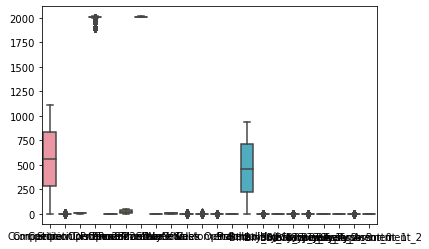

<Figure size 576x432 with 0 Axes>

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=merge_df)
plt.figure(figsize = (8,6))
plt.show()


In [ ]:
from scipy import stats

z_scores = stats.zscore(merge_df)
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

df_cleaned = merge_df[outliers]


### **9. Check corelation of columns and show which were most relevant**
1. Corelation matrix and answer your findings

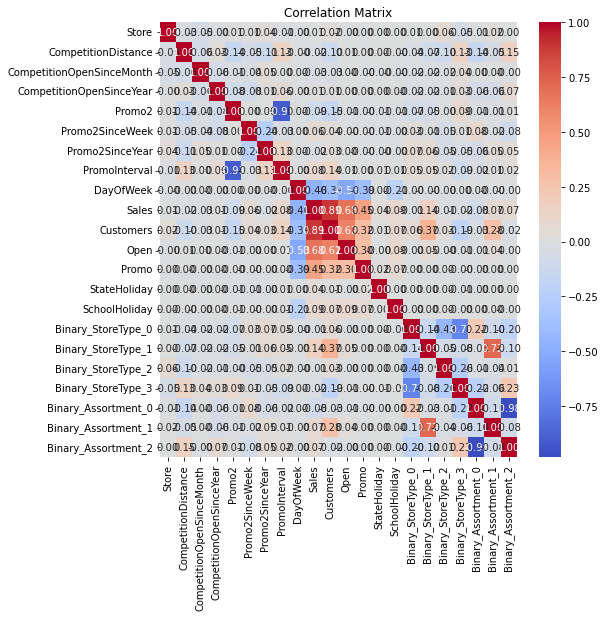

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix =merge_df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### **Rest of the Lab Questions**

How many unique stores are in the train_store dataframe, and what are their IDs?

In [6]:
unique_store_count = merge_df['Store'].nunique()

unique_store_ids = ', '.join(map(str, merge_df['Store'].unique()))

#Dataframe
result_df = pd.DataFrame({'unique_store_count': [unique_store_count], 'unique_store_ids': [unique_store_ids]})

print(result_df)

   unique_store_count                                   unique_store_ids
0                1115  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,...


What is the average daily sales for each store in the train_store dataframe?

In [31]:
average_daily_sales_result = merge_df.groupby('Store', as_index=False)['Sales'].mean()

# Print the result
print(average_daily_sales_result)


      Store         Sales
0         1   3945.704883
1         2   4122.991507
2         3   5741.253715
3         4   8021.769639
4         5   3867.110403
...     ...           ...
1110   1111   4342.968153
1111   1112   8465.280255
1112   1113   5516.180467
1113   1114  17200.196391
1114   1115   5225.296178

[1115 rows x 2 columns]


How many days of data are included in the train_store dataframe, and what is the range of dates?

In [52]:
no_of_days = merge_df.agg({'Date':['nunique','min','max']}).rename(columns={'nunique':'NUMDAYS','min':'MINDATE','max':'MAXDATE'})
print(no_of_days)

               Date
nunique         942
min      2013-01-01
max      2015-07-31


What is the average sales per customer for each store in the train_store dataframe?

In [54]:
average_sales_per_customer_result = merge_df.groupby('Store')['Sales'].sum() / merge_df.groupby('Store')['Customers'].sum()

# Reset the index to get a DataFrame
average_sales_per_customer_result = average_sales_per_customer_result.reset_index(name='AvgSalesPerCustomer')

print(average_sales_per_customer_result)


      Store  AvgSalesPerCustomer
0         1             8.437366
1         2             8.482725
2         3             9.255808
3         4             7.292138
4         5             8.702634
...     ...                  ...
1110   1111            11.626239
1111   1112            12.206623
1112   1113             9.243499
1113   1114             6.456391
1114   1115            14.567807

[1115 rows x 2 columns]


How many days of the week does each store in the train_store dataframe open and close?

In [55]:
import pandasql as psql
pysqldf = lambda q: psql.sqldf(q, globals())


In [59]:
store_open_close = """
    SELECT Store,
            SUM(
                CASE WHEN Open = 1 THEN 1
                ELSE 0
                END) AS OpenDays,
            SUM(
                CASE 
                    WHEN Open = 0 THEN 1
                    ELSE 0 
                END) AS ClosedDays
    FROM merge_df
    GROUP BY Store;
"""
open_close_days = pysqldf(store_open_close)
print(open_close_days)

      Store  OpenDays  ClosedDays
0         1       781         161
1         2       784         158
2         3       779         163
3         4       784         158
4         5       779         163
...     ...       ...         ...
1110   1111       779         163
1111   1112       779         163
1112   1113       784         158
1113   1114       784         158
1114   1115       781         161

[1115 rows x 3 columns]


What is the correlation between the Sales and Customers columns in the train_store dataframe?

In [63]:
corr = merge_df['Sales'].corr(merge_df['Customers'])
print("Correlation between Sales and Customers: ",corr)

Correlation between Sales and Customers:  0.8947107733017075


## <CENTER><h1>CONGRATULATION YOU MADE IT! :D</h1></center>